# Supplement sales Weekly Expanded Dataset

### Ce dataset contient des informations détaillées sur les ventes de produits de compléments alimentaires sur différentes plateformes en ligne et dans divers pays. Chaque ligne représente une vente spécifique effectuée à une date donnée.

### Colonnes disponibles :
### Date : La date de la transaction.

### Product Name : Le nom du produit vendu (par exemple : Whey Protein, Vitamin C…).

### Category : La catégorie du produit (ex : Protein, Vitamin, Omega, etc.).

### Units Sold : Le nombre d’unités vendues.

### Price : Le prix unitaire du produit (en dollars).

### Revenue : Le chiffre d’affaires généré pour cette transaction.

### Discount : Le pourcentage de réduction appliqué lors de l’achat.

### Units Returned : Le nombre d’unités retournées après l’achat.

### Location : Le pays dans lequel la vente a eu lieu.

### Platform : La plateforme sur laquelle la vente a été réalisée (ex : Amazon, Walmart, iHerb…).



- # Affichage des données

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
Df=pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")
Df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


### ce projet a comme but de creer un modele qui aide á prédire le revenu d'un individu en fonction de ses caracteristiques

In [73]:
# on commence donc par se suffir des features dont on aur besoin uniquement 
# Liste des colonnes qu'on garde
features= [
    'Category',
    'Units Sold',
    'Price',
    'Revenue',
    'Discount',
    'Units Returned',
    'Location',
    'Platform'
]
df=Df[features]

In [74]:
df

,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...
4379,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon


In [75]:
Df['Category'].unique()

array(['Protein', 'Vitamin', 'Omega', 'Performance', 'Amino Acid',
       'Mineral', 'Herbal', 'Sleep Aid', 'Fat Burner', 'Hydration'],
      dtype=object)

In [76]:
Df['Location'].unique()

array(['Canada', 'UK', 'USA'], dtype=object)

In [77]:
Df['Platform'].unique()

array(['Walmart', 'Amazon', 'iHerb'], dtype=object)

- # nettoyage des données

In [78]:
df.isnull().sum()

Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [79]:
# gestion des doublons
df.duplicated().sum()

0

<Axes: >

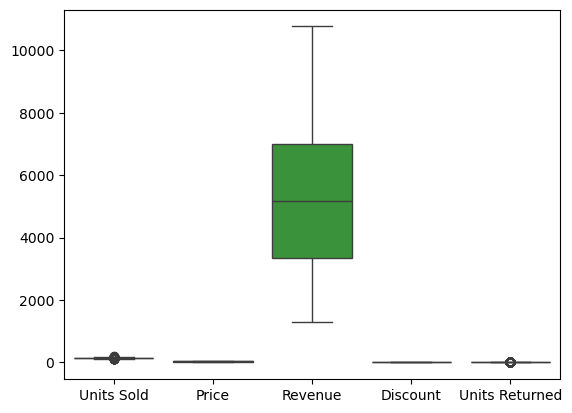

In [80]:
# afficher les valeurs aberrantes
sns.boxplot(df)

- # Analyse des données

In [81]:
# combien de produit est vendu dans chaque plateforme?

produit_par_plateform = df['Platform'].value_counts()

# Afficher le résultat
print(produit_par_plateform)

Platform
iHerb      1499
Amazon     1473
Walmart    1412
Name: count, dtype: int64


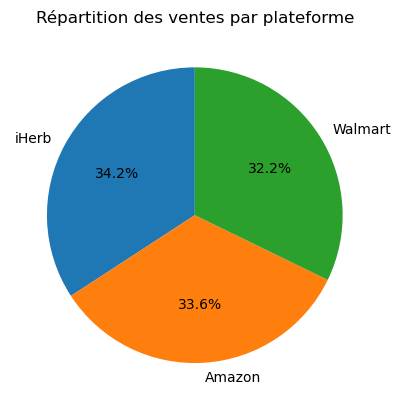

In [82]:
produit_par_plateform.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Répartition des ventes par plateforme')
plt.ylabel('') 
plt.show()

In [83]:
# distribution des ventes selon la location
vente_par_location= df['Location'].value_counts()
print(vente_par_location)

Location
Canada    1507
UK        1475
USA       1402
Name: count, dtype: int64


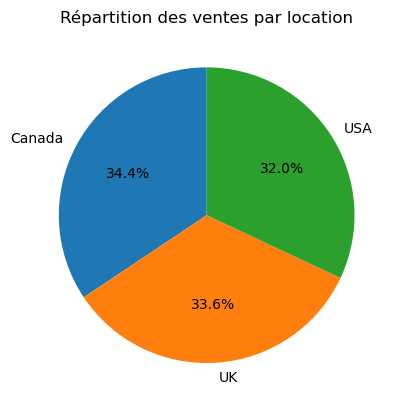

In [84]:
vente_par_location.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Répartition des ventes par location')
plt.ylabel('') 
plt.show()

In [85]:
df

,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...
4379,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon


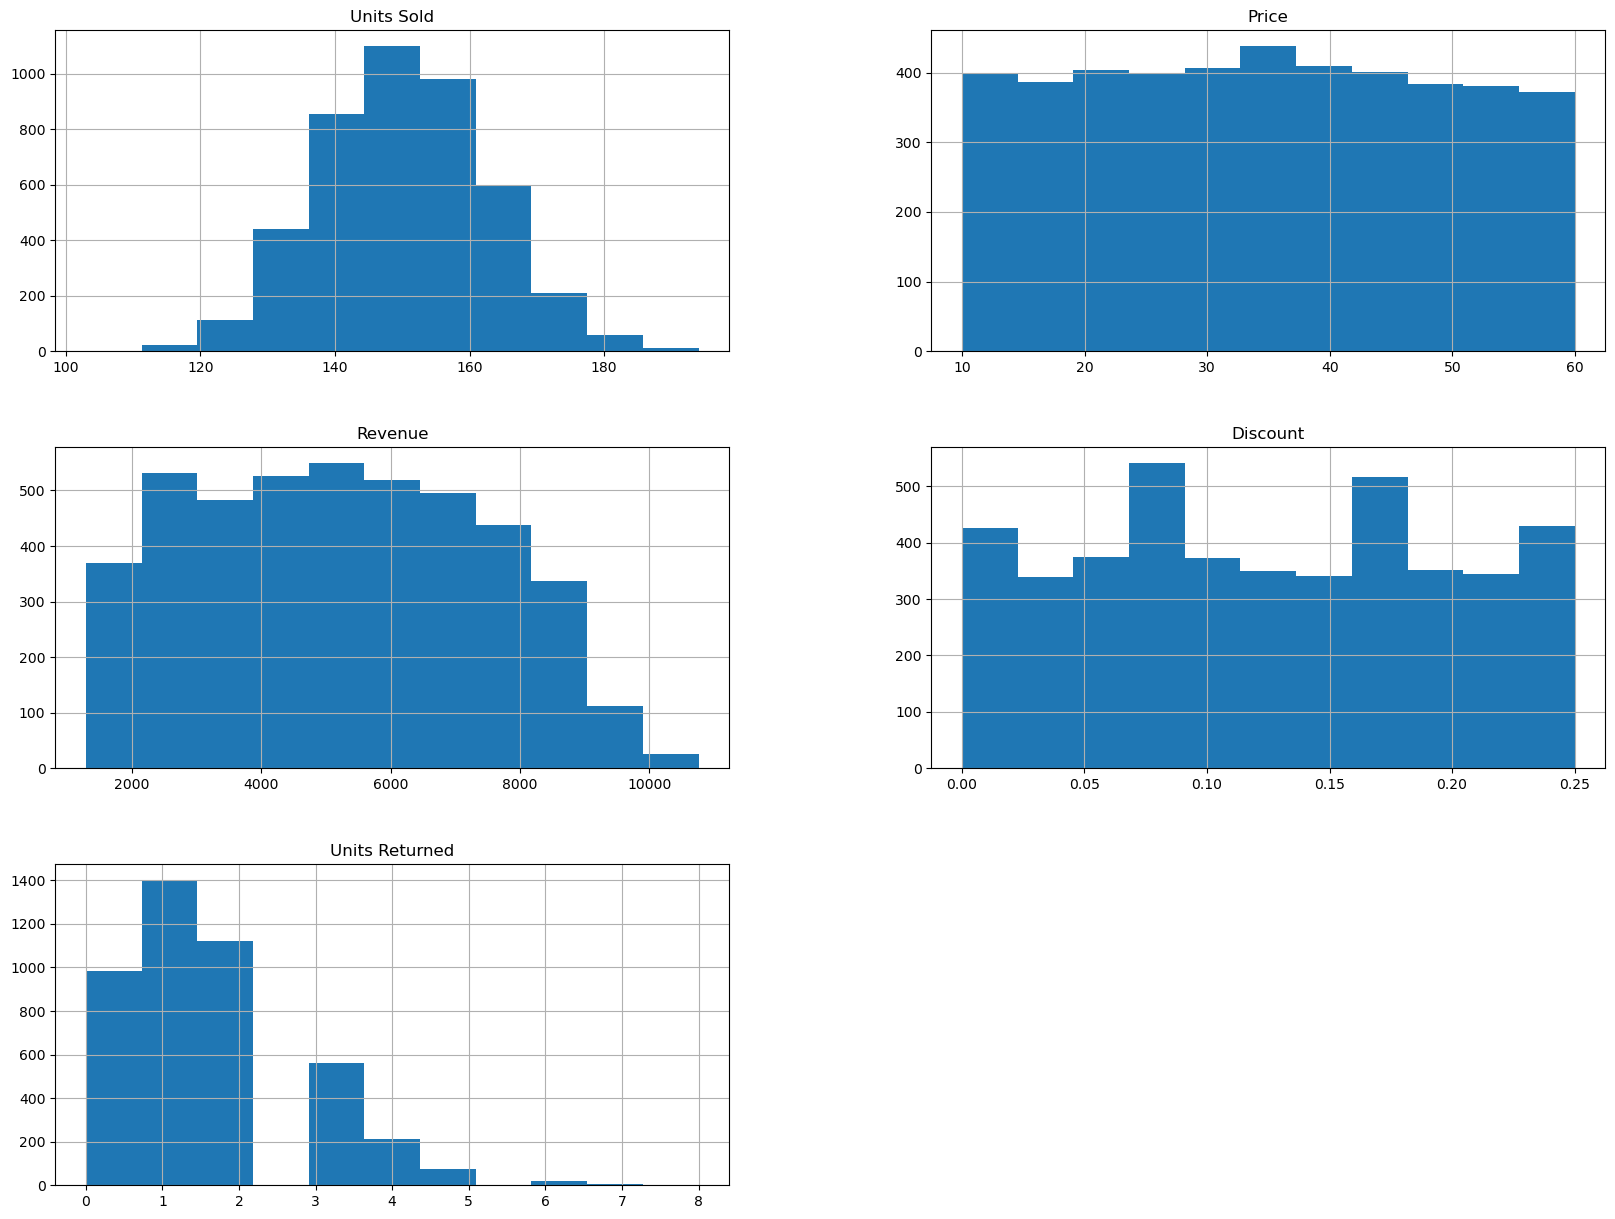

In [86]:
df.hist(bins=11,figsize=(20,15))
plt.show()

- # Encodage des colonnes categoricales

In [87]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Créer un encodeur
label_encoder = LabelEncoder()

# Liste des colonnes à encoder
categorical_columns = ['Category', 'Location', 'Platform']

# Encoder chaque colonne
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Afficher les 5 premières lignes pour vérifier
print(df.head())

# Division des données (features et target)
x = df.drop(columns='Revenue')
y = df['Revenue']

# Normalisation : on ne normalise que les colonnes numériques
scaler = StandardScaler()
scaled_cols = ['Units Sold', 'Price', 'Discount']  # Colonne numérique à normaliser

# Appliquer la normalisation uniquement sur ces colonnes
x[scaled_cols] = scaler.fit_transform(x[scaled_cols])

# Division des données en train et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vérification du format après division
print(x_train.head())
print(y_train.head())


   Category  Units Sold  Price  Revenue  Discount  Units Returned  Location  \
0         7         143  31.98  4573.14      0.03               2         0   
1         9         139  42.51  5908.89      0.04               0         1   
2         5         161  12.91  2078.51      0.25               0         0   
3         9         140  16.07  2249.80      0.08               0         0   
4         6         157  35.47  5568.79      0.25               3         0   

   Platform  
0         1  
1         0  
2         0  
3         1  
4         2  
      Category  Units Sold     Price  Discount  Units Returned  Location  \
647          4   -1.307034  0.962814 -0.200573               1         0   
2194         5   -2.355870  1.734121  0.495966               1         0   
2244         6   -0.419557 -1.034835 -1.454342               2         0   
4258         5   -2.355870 -0.838310 -1.593650               0         0   
1164         9   -0.580916 -1.215863  0.078043               

C:\Users\dell\AppData\Local\Temp\ipykernel_25852\140035512.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_25852\140035512.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_25852\140035512.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

- # division des features en x et y

In [88]:
#x= df.drop(columns='Revenue')
#y=df['Revenue']

- # Normalisation des données

In [89]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaled_cols = ['Units Sold', 'Price', 'Discount'] 

#df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [90]:
df

,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,7,143,31.98,4573.14,0.03,2,0,1
1,9,139,42.51,5908.89,0.04,0,1,0
2,5,161,12.91,2078.51,0.25,0,0,0
3,9,140,16.07,2249.80,0.08,0,0,1
4,6,157,35.47,5568.79,0.25,3,0,2
...,...,...,...,...,...,...,...,...
4379,8,160,47.79,7646.40,0.21,1,2,2
4380,9,154,38.12,5870.48,0.22,1,1,1
4381,1,139,20.40,2835.60,0.12,3,2,2
4382,4,154,18.31,2819.74,0.23,2,0,0


In [91]:
df['Category'].unique()

array([7, 9, 5, 6, 0, 4, 2, 8, 1, 3])

- # Division des données

In [92]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

- # La regression Linéaire

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(x_test)

In [95]:
# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 28936.58121441383
R² Score: 0.9937357065623739


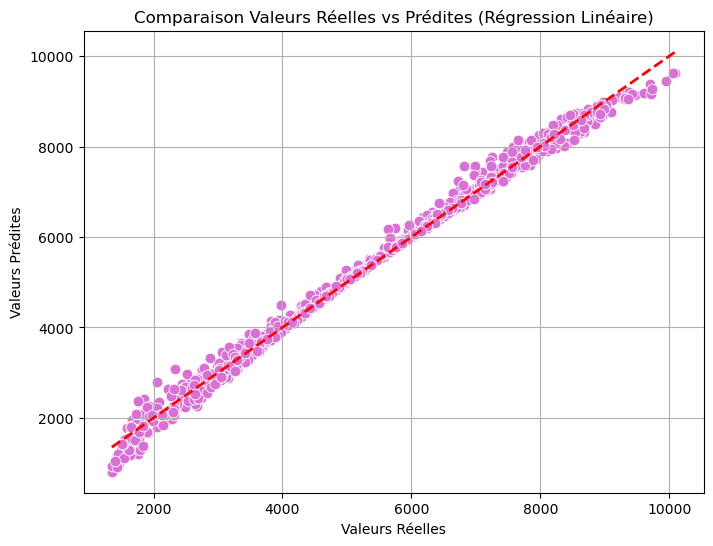

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='orchid', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # la diagonale parfaite
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison Valeurs Réelles vs Prédites (Régression Linéaire)')
plt.grid(True)
plt.show()


- # Decision Tree

In [97]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
y_pred_tree = tree_model.predict(x_test)


In [99]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"MSE: {mse_tree}")
print(f"R² Score: {r2_tree}")

MSE: 8278.919622805019
R² Score: 0.9982077502010521


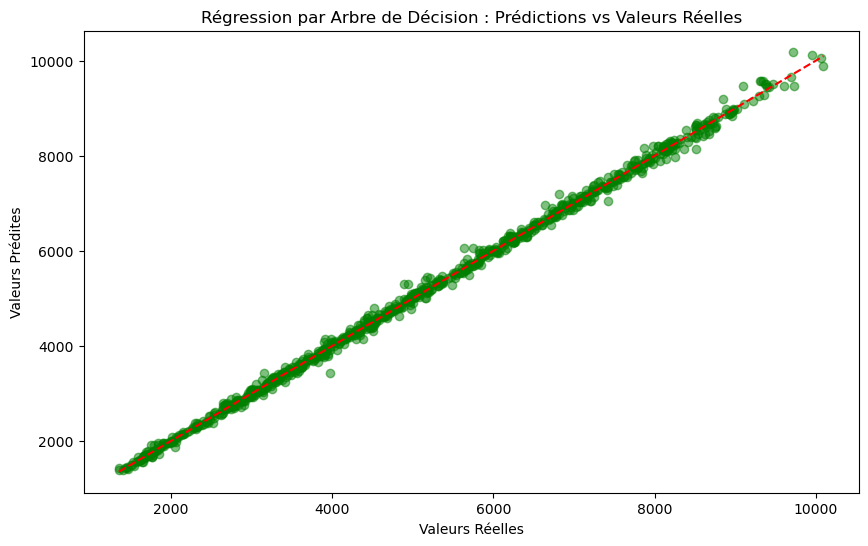

In [100]:
# Création du graphique pour visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Régression par Arbre de Décision : Prédictions vs Valeurs Réelles")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.show()


- # Random forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [102]:
y_pred_rf = rf_model.predict(x_test)

In [103]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [104]:
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")

MSE: 3014.990451198718
R² Score: 0.9993473042043909


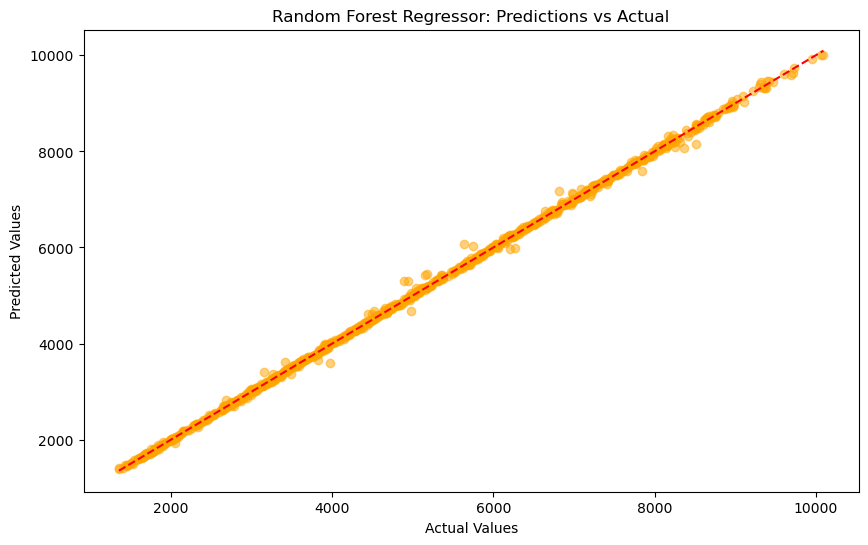

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Random Forest Regressor: Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

- # KNN 

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Tu peux ajuster n_neighbors
knn_model.fit(x_train, y_train)


KNeighborsRegressor()

In [107]:
y_pred_knn = knn_model.predict(x_test)


In [108]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"MSE: {mse_knn}")
print(f"R² Score: {r2_knn}")

MSE: 333313.60899472755
R² Score: 0.9278430911369342


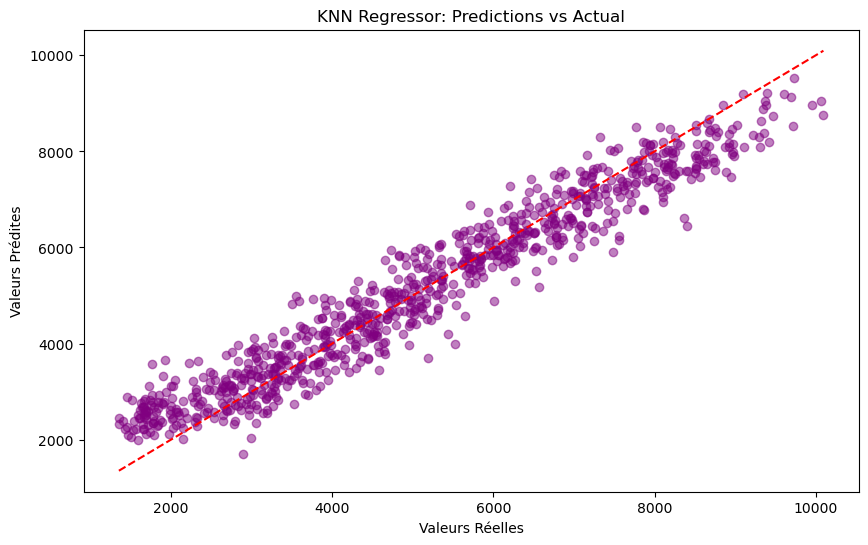

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("KNN Regressor: Predictions vs Actual")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.show()

- # SVM

In [110]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
svr_model = SVR(kernel='rbf') 
svr_model.fit(x_train_scaled, y_train_scaled)



SVR()

In [111]:
y_pred_svr_scaled = svr_model.predict(x_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

In [112]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [113]:
print(f"MSE: {mse_svr}")
print(f"R² Score: {r2_svr}")

MSE: 24408.701248824196
R² Score: 0.9947159180305024


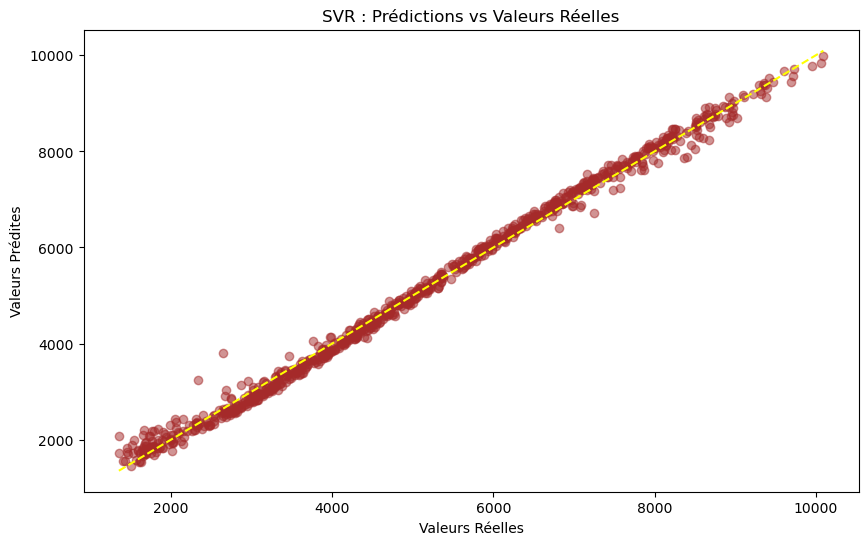

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='brown', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linestyle='--')
plt.title("SVR : Prédictions vs Valeurs Réelles")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.show()

### Voici une coclusion des resultats des modeles 

|  Model          |  MSE       |   R² Score       |
| ----------------- | ------------ | ----------------- |
| Linear Regression | 28,936.58    | 0.9937            |
| Decision Tree     | 8,340.44     | 0.9982            |
| Random Forest     | **3,019.33** | **0.9993**   |
| KNN               | 9,974.67     | 0.9978            |
| SVR (RBF)         | 24,408.70    | 0.9947            |


- # Enregistrement du meilleur model

In [116]:
import joblib
joblib.dump(rf_model, 'rf2.pkl')

['rf2.pkl']